# Overview

# Data Manipulation Libraries

In [1]:
import numpy as np
import pandas as pd

# Data Visualization Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data

In [3]:
# Using pandas read_csv to read the loan_data.csv file
# into a dataframe loans.
loans = pd.read_csv('loan_data.csv')

Initial Insights into the Data

In [4]:
# gives the information about the type of the features
# and the count of values for each features.
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


It seems that there are no missing values in our dataset.

In [5]:
#Lets see the statistical description of numerical features of the dataset.
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Peaking into the data.

In [6]:
# To display the first 5 rows of the dataset.
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

In [8]:
#sns.pairplot(loans)

Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

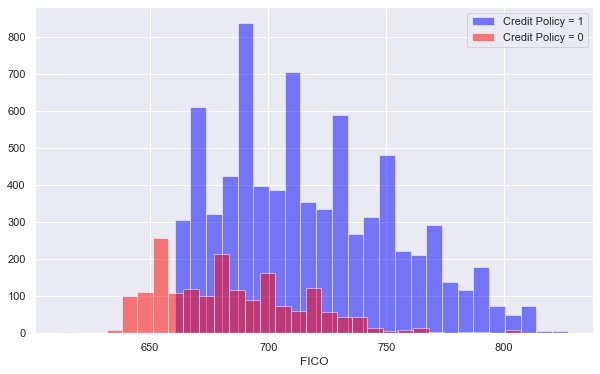

In [13]:
sns.set()
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit Policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit Policy = 0')
plt.legend()
plt.xlabel('FICO')

Create a histogram of two FICO distributions on top of each other, one for each not.fully.paid column.

Text(0.5, 0, 'FICO')

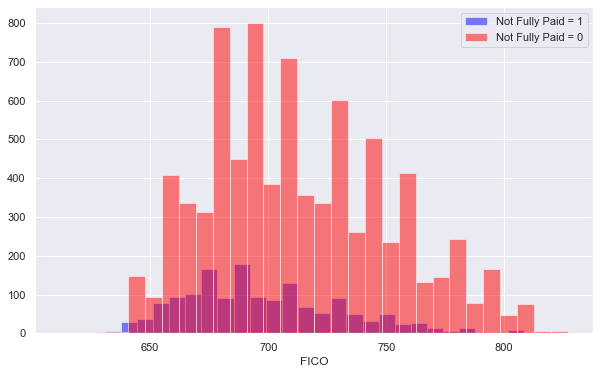

In [14]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Not Fully Paid = 1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Not Fully Paid = 0')
plt.legend()
plt.xlabel('FICO')

Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid

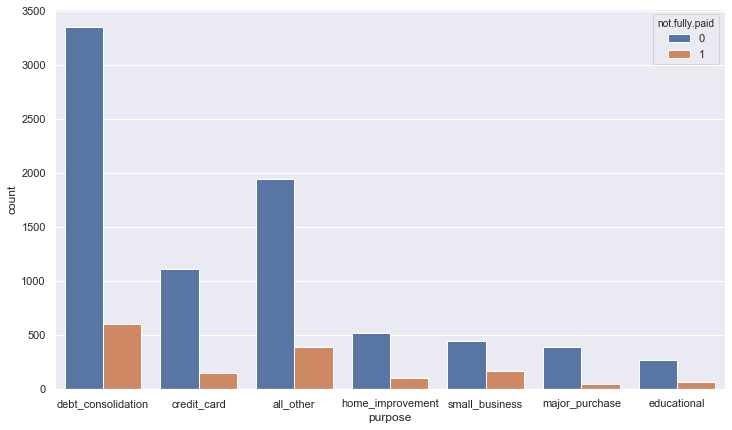

In [17]:
plt.figure(figsize=(12,7))
sns.countplot(x='purpose', data = loans, hue= 'not.fully.paid')

It seems from the above graph that most of the loans that are not paid are of purpose debt_consolidation, all_other, small_business and credit_card.

<Figure size 864x432 with 0 Axes>

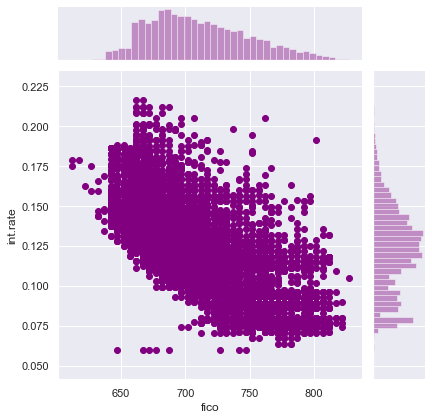

In [18]:
plt.figure(figsize = (12,6))
sns.jointplot(x = 'fico', y = 'int.rate', data = loans, color = 'purple')

<Figure size 864x432 with 0 Axes>

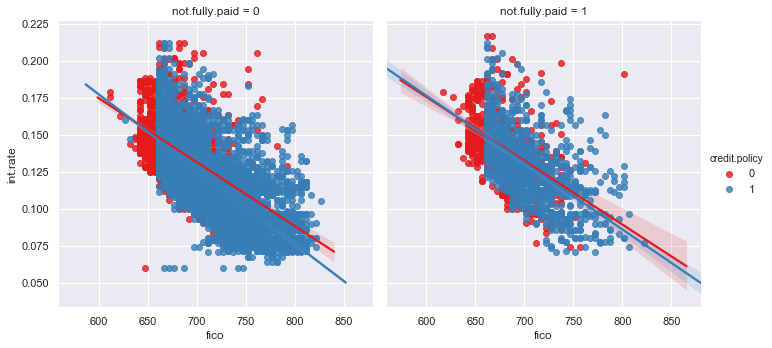

In [20]:
plt.figure(figsize=(12,6))
sns.lmplot(y = 'int.rate', x='fico',data=loans, hue='credit.policy', col='not.fully.paid', palette = 'Set1')

# Setting up the Data

In [21]:
cat_features = ['purpose']

In [23]:
final_data = pd.get_dummies(loans,columns=cat_features,drop_first=True)

In [24]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Training a Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [28]:
dec_tree = DecisionTreeClassifier()

In [29]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Predictions

In [30]:
prediction = dec_tree.predict(X_test)

# Evaluations

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2394
           1       0.22      0.22      0.22       480

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.74      0.74      2874



In [35]:
print(confusion_matrix(y_test, prediction))

[[2021  373]
 [ 376  104]]


# Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators = 600)

In [38]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Predictions

In [39]:
predictions = rfc.predict(X_test)

# Evaluations

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2394
           1       0.46      0.01      0.02       480

    accuracy                           0.83      2874
   macro avg       0.65      0.50      0.47      2874
weighted avg       0.77      0.83      0.76      2874



In [42]:
print(confusion_matrix(y_test, predictions))

[[2387    7]
 [ 474    6]]
